2.3.1

In [3]:
import pandas as pd
import numpy as np
from sqlalchemy import false

adc = pd.read_csv('S02-hw-dataset.csv')
print(adc.head())
print(adc.info())
print(adc.describe())

   user_id   age country  purchases  revenue
0        1  25.0      FR          7      749
1        2  24.0      RU          5     1115
2        3  52.0      FR          7      399
3        4  31.0      RU          6      654
4        5   NaN      DE          6     1296
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
None
         user_id         age  purchases      revenue
count  41.000000   39.000000  41.000000    41.000000
mean   20.243902   36.512821   4.829268   820.048780
std    11.659289   18.304259   2.710189   613.127269
min     1.000000    5.000000  -1.000000     0.000000
25%    10.000000

2.3.2. Пропуски, дубликаты и базовый контроль качества

In [9]:
adc = pd.read_csv('S02-hw-dataset.csv')
print(adc.isnull().mean())
print([i if k else False for i, k in enumerate(adc.duplicated())])

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, 40]


In [30]:
adc = pd.read_csv('S02-hw-dataset.csv')
print(adc[adc['age'] > 100])
print(adc[adc['age'].isnull()])
print(adc[adc['purchases'] < 0])
print(adc[(adc['revenue'] <= 0) & (adc['purchases'] > 0)])

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
    user_id  age country  purchases  revenue
4         5  NaN      DE          6     1296
12       13  NaN      US          9      630
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


Часть данных не полна, не хватает 2 значений возрасту(других значений 41, а возраста 39), так же присутствуют нереалестичные значения такие как 120 возраст, отрицательное количество покупок и нулевая прибыль при нескольких продажах

2.3.3. Базовый EDA: группировки, агрегаты и частоты

In [47]:
adc = pd.read_csv('S02-hw-dataset.csv')
print("country:", adc['country'].value_counts(normalize=True) * 100)

country: country
RU    31.707317
FR    29.268293
US    19.512195
DE    14.634146
CN     4.878049
Name: proportion, dtype: float64


In [66]:

adc = pd.read_csv('S02-hw-dataset.csv')
grouped_data = adc.groupby(by='country')['purchases'].mean()
print("Среднее количество покупок по странам:", grouped_data)


Среднее количество покупок по странам: country
CN    4.500000
DE    6.500000
FR    4.250000
RU    4.769231
US    4.625000
Name: purchases, dtype: float64


В данном датасете преобладают жители России, так же у русских выше среднее количество покупок, а другие значения не зависимо от процентного соотношения имеют почти одинаковое среднее значение

2.4. Визуализация данных в Matplotlib

Text(0.5, 0, 'Средний возраст (age)')

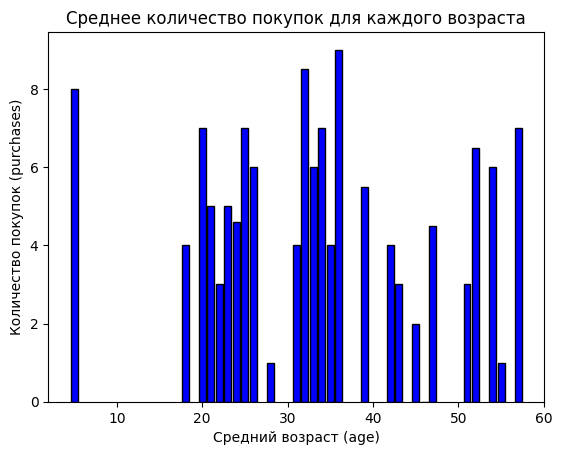

In [10]:

import matplotlib.pyplot as plt
adc = pd.read_csv('S02-hw-dataset.csv')
adc = adc[adc['age'] < 100]
grouped_data = adc.groupby(by='age')['purchases'].mean()

plt.bar(x=grouped_data.index,
        height=grouped_data.values,
        color='blue',
        edgecolor='k')
plt.title('Среднее количество покупок для каждого возраста')
plt.ylabel('Количество покупок (purchases)')
plt.xlabel('Средний возраст (age)')


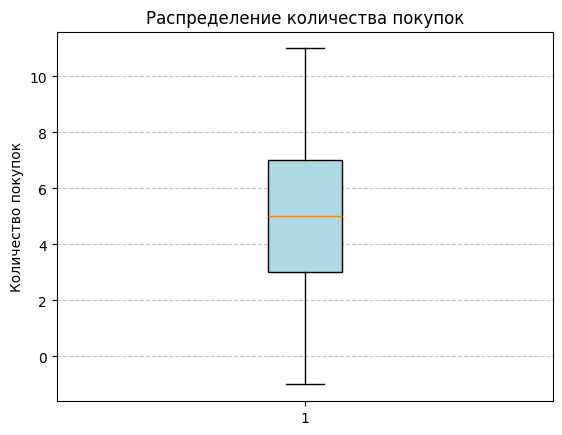

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

adc = pd.read_csv('S02-hw-dataset.csv')

plt.boxplot(adc['purchases'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Распределение количества покупок')
plt.ylabel('Количество покупок')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

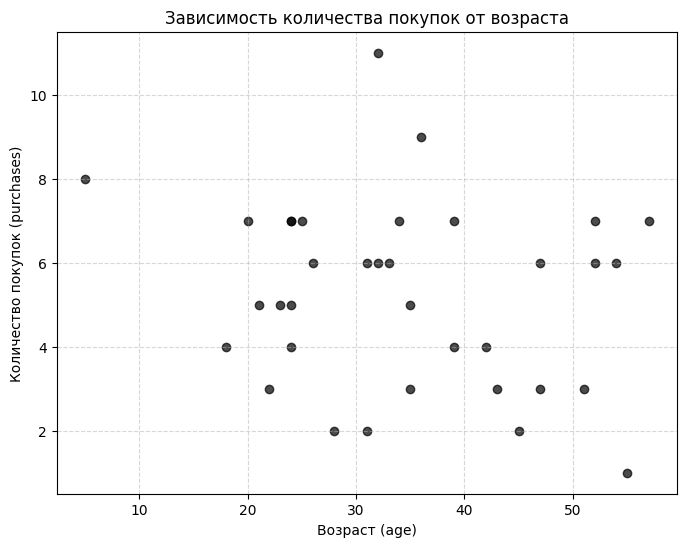

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
adc = pd.read_csv('S02-hw-dataset.csv')
adc = adc[adc['purchases'] > 0]
adc_clean = adc[adc['age'] < 100]


plt.figure(figsize=(8, 6))
plt.scatter(adc_clean['age'], adc_clean['purchases'], color='black', alpha=0.7, edgecolor='k')
plt.title('Зависимость количества покупок от возраста')
plt.xlabel('Возраст (age)')
plt.ylabel('Количество покупок (purchases)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("figures/gpgp.png")
plt.show()


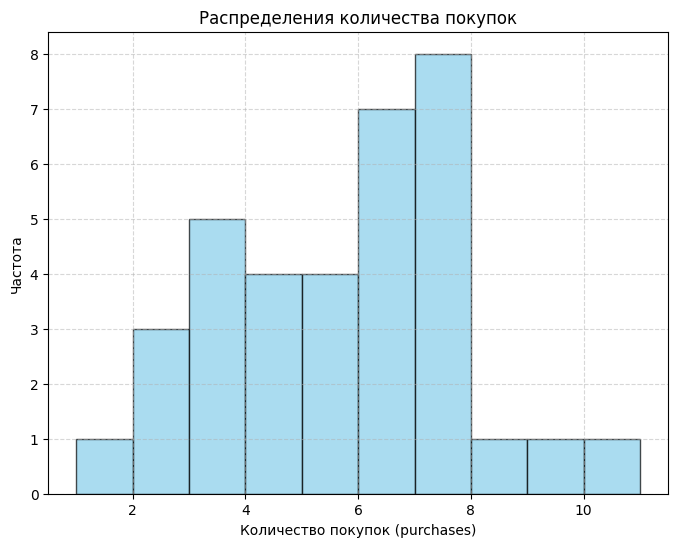

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

adc = pd.read_csv('S02-hw-dataset.csv')
adc = adc[adc['purchases'] > 0]
adc_clean = adc[adc['age'] < 100]


plt.figure(figsize=(8, 6))
plt.hist(adc_clean['purchases'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределения количества покупок')
plt.xlabel('Количество покупок (purchases)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("figures/purchases_hist.png")
plt.show()